# Capstone Project - The Battle of Neighborhoods

## Suitable New  Locations in Paris for a restaurant


### introduction 

Paris is the capital and most populous city of France. Since the 17th century, Paris has been one of Europe's major centres of finance, diplomacy, commerce, fashion, science and arts. 
Paris received 24.5 million visitors in 2018, measured by hotel stays, with the largest numbers of foreign visitors coming from the United States, the United Kingdom, Germany and China. It was ranked as the second most visited travel destination in the world in 2018, after Bangkok.

For the Capstone project, I chose the city of Paris to analyze its geospatial data in order to select a location for a new restaurant. The decision will have to be made using a data-driven approach, where we will analyze the geospatial data and use the location of spas, art galeries and clothing stores.



#### Criteria


The best places to open a new japenese restaurant are areas that are near places where people wait to eat : Art galery, spa, clothing stores.
The client's critera is to have 2 out of three of these 3 places.
Parisians are very social people that frequent these place often, so opening restaurants in these locations is becoming popular.
The analysis and recommendations for new restaurant locations will focus on general districts with these establishments, not on specific store addresses. 

### Data Research and Preparation

#### Import the Paris District Data

Paris is divided into 20 Municipal Districts (or administrative districts), reduced to arrondissements. They are normally referred to by the district number rather than by a name.

Data of the arrondissements is necessary to select the most suitable of our restaurant.

The data used is available on the web and can be manipulated and cleaned to provide a meaningful dataset to use.
the data used is from : https://www.data.gouv.fr/fr/datasets/arrondissements-1/
after importing the data we can croceed to cleaning of the data set

In [2]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

import folium 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import requests

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

'''

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')'''

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::pyopenssl==19.0.0=py37_0
  - defaults/noarch::qtawesome==0.6.0=py_0
  - defaults/noarch::prompt_toolkit==2.0.10=py_0
  - defaults/osx-64::pytest-astropy==0.5.0=py37_0
  - defaults/osx-64::imageio==2.6.0=py37_0
  - defaults/noarch::descartes==1.1.0=py_3
  - defaults/osx-64::pyrsistent==0.15.4=py37h1de35cc_0
  - defaults/osx-64::jupyter==1.0.0=py37_7
  - defaults/osx-64::pytables==3.5.2=py37h5bccee9_1
  - defaults/osx-64::scikit-image==0.15.0=py37h0a44026_0
  - defaults/osx-64::mock==3.0.5=py37_0
  - defaults/osx-64::widgetsnbextension==3.5.1=py37_0
  - defaults/noarch::numpydoc==0.9.1=py_0
  - defaults/osx-64::conda-package-handling==1.6.0=py37h1de35cc_0
  - defaults/osx-64::cycler==0.10.0=py37_0
  - defaults/osx-64::pytest==5.2.1=py37_0
  - defaults/osx-64::pathlib2==2.3.5=py37_0
  - anaconda/osx-64::py-xgboost==0.9

"\n\nfrom bs4 import BeautifulSoup\n\n# Import k-means from clustering stage\nfrom sklearn.cluster import KMeans\n\n!conda install -c conda-forge folium=0.5.0 --yes \nimport folium # map rendering library\n\nprint('Libraries imported.')"

In [3]:
paris = pd.read_csv("/Users/ahmedjabrane/downloads/arrondissements.csv", sep='\;')
lat_split = []
long_split = []
for i in range(paris.shape[0]):
    g = paris['Geometry X Y'].iloc[i].split(',')
    lat_split.append(g[0])
    long_split.append(g[1])
    
paris['lat'] = lat_split
paris['lon'] = long_split

paris.head()

/Users/ahmedjabrane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,N_SQ_AR,C_AR,C_ARINSEE,L_AR,L_AROFF,N_SQ_CO,SURFACE,PERIMETRE,Geometry X Y,Geometry,OBJECTID,LONGUEUR,lat,lon
0,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"48.8625627018,2.33644336205","""{""""type"""": """"Polygon"""", """"coordinates"""": [[[2...",1,6054.680862,48.8625627018,2.33644336205
1,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"48.8682792225,2.34280254689","""{""""type"""": """"Polygon"""", """"coordinates"""": [[[2...",2,4553.938764,48.8682792225,2.34280254689
2,750000017,17,75117,17ème Ardt,Batignolles-Monceau,750001537,5.668835e+06,10775.579516,"48.887326522,2.30677699057","""{""""type"""": """"Polygon"""", """"coordinates"""": [[[2...",17,10775.348915,48.887326522,2.30677699057
3,750000014,14,75114,14ème Ardt,Observatoire,750001537,5.614877e+06,10317.483310,"48.8292445005,2.3265420442","""{""""type"""": """"Polygon"""", """"coordinates"""": [[[2...",14,10316.720258,48.8292445005,2.3265420442
4,750000020,20,75120,20ème Ardt,Ménilmontant,750001537,5.983446e+06,10704.940486,"48.8634605789,2.40118812928","""{""""type"""": """"Polygon"""", """"coordinates"""": [[[2...",20,10704.483774,48.8634605789,2.40118812928


#### Exploring, Wrangling and Cleaning the Data¶

In [4]:
paris = paris.drop(['OBJECTID','N_SQ_AR','Geometry X Y','C_ARINSEE','N_SQ_CO','SURFACE','Geometry','LONGUEUR','PERIMETRE'], axis=1)
paris.rename(columns={'C_AR': 'Arrondissement_Num','L_AROFF': 'Neighborhood ', 'L_AR': 'french name', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Arrondissement_Num,french name,Neighborhood,lat,lon
0,1,1er Ardt,Louvre,48.8625627018,2.33644336205
1,2,2ème Ardt,Bourse,48.8682792225,2.34280254689
2,17,17ème Ardt,Batignolles-Monceau,48.887326522,2.30677699057
3,14,14ème Ardt,Observatoire,48.8292445005,2.3265420442
4,20,20ème Ardt,Ménilmontant,48.8634605789,2.40118812928
5,7,7ème Ardt,Palais-Bourbon,48.8561744288,2.31218769148
6,11,11ème Ardt,Popincourt,48.8590592213,2.3800583082
7,13,13ème Ardt,Gobelins,48.8283880317,2.36227244042
8,4,4ème Ardt,Hôtel-de-Ville,48.8543414263,2.35762962032
9,8,8ème Ardt,Élysée,48.8727208374,2.3125540224


#### the latitude and longitude values of Paris

In [5]:
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


#### Create a map of Paris with arrondissements

In [70]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['lat'], paris['lon'], paris['french name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

#### Week 1
We now have located and imported the relevant data for the districts of Paris.
Our business objective, strategy and methods to achieve our goal have been laid out, and a data workflow established.
Next up, we will leverage Foursquare location data to obtain data on high traffic areas - where consumers go for shopping, restaurants and entertainment - in all of the 20 districts.
The Battle of Neighborhoods continues in the next section.

#### Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods)

In [7]:
CLIENT_ID = 'MB5ZSSZNHKCSHXYIQCYBKIRCCUAEB5EE2GRK5LVGZOE120US' # your Foursquare ID
CLIENT_SECRET = 'GLBR45QLOFUOGVVOJIQXO4ABYLM3NBPXAA3PNHDAZRNGS5FT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MB5ZSSZNHKCSHXYIQCYBKIRCCUAEB5EE2GRK5LVGZOE120US
CLIENT_SECRET:GLBR45QLOFUOGVVOJIQXO4ABYLM3NBPXAA3PNHDAZRNGS5FT


#### Explore the first district in our dataframe to become familiar with the data

In [8]:
# Explore the first Neighborhood in our dataframe.
# Get the Neighborhood's French name.

paris.loc[0, 'french name']

'1er Ardt'

The first arrondissement is identified as 1er Ardt

In [9]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'lat'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'lon'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'french name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 1er Ardt are 48.8625627018, 2.33644336205.


#### the top 100 venues that are in the neighborhood 1er Ardt within a radius of 500 meters

In [10]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=MB5ZSSZNHKCSHXYIQCYBKIRCCUAEB5EE2GRK5LVGZOE120US&client_secret=GLBR45QLOFUOGVVOJIQXO4ABYLM3NBPXAA3PNHDAZRNGS5FT&v=20180605&ll=48.8625627018,2.33644336205&radius=500&limit=100'

In [11]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eac442ead1ab4001b4cdcd6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Palais-Royal',
  'headerFullLocation': 'Palais-Royal, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 71,
  'suggestedBounds': {'ne': {'lat': 48.867062706300004,
    'lng': 2.3432708806102673},
   'sw': {'lat': 48.8580626973, 'lng': 2.3296158434897323}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adcda10f964a520af3521e3',
       'name': 'Musée du Louvre',
       'location': {'address': 'Rue de Rivoli',
        'crossStreet': 'Place du Carrousel',
        'lat': 48.86084691113991,
        'lng': 2.336440086364746,
        'labeledLatLngs': [

#### Define the function that extracts the category of the venue

In [12]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Structure the json file into a pandas dataframe

In [13]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Musée du Louvre,Art Museum,48.860847,2.336440
1,Palais Royal,Historic Site,48.863236,2.337127
2,Comédie-Française,Theater,48.863088,2.336612
3,La Clef Louvre Paris,Hotel,48.863977,2.336140
4,Cour Napoléon,Plaza,48.861172,2.335088
5,Place du Palais Royal,Plaza,48.862523,2.336688
6,Vestige de la Forteresse du Louvre,Historic Site,48.861577,2.333508
7,Place Colette,Plaza,48.863145,2.335943
8,LouLou,Italian Restaurant,48.862804,2.333500
9,Les Arts Décoratifs,Art Museum,48.863077,2.333393


In [14]:
# Check how many venues there are in 3eme Ardt within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

71 venues were returned by Foursquare.


#### Create a nearby venues function for all the neighborhoods in Paris

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Create a new dataframe called for the venues of Paris called paris-venues

In [17]:
paris_venues = getNearbyVenues(names=paris['french name'],
                                   latitudes=paris['lat'],
                                   longitudes=paris['lon']
                              )

1er Ardt
2ème Ardt
17ème Ardt
14ème Ardt
20ème Ardt
7ème Ardt
11ème Ardt
13ème Ardt
4ème Ardt
8ème Ardt
18ème Ardt
9ème Ardt
19ème Ardt
15ème Ardt
3ème Ardt
5ème Ardt
6ème Ardt
12ème Ardt
10ème Ardt
16ème Ardt


In [18]:
print(paris_venues.shape)
paris_venues.head(250)

(1237, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1er Ardt,48.8625627018,2.33644336205,Musée du Louvre,48.860847,2.336440,Art Museum
1,1er Ardt,48.8625627018,2.33644336205,Palais Royal,48.863236,2.337127,Historic Site
2,1er Ardt,48.8625627018,2.33644336205,Comédie-Française,48.863088,2.336612,Theater
3,1er Ardt,48.8625627018,2.33644336205,La Clef Louvre Paris,48.863977,2.336140,Hotel
4,1er Ardt,48.8625627018,2.33644336205,Cour Napoléon,48.861172,2.335088,Plaza
5,1er Ardt,48.8625627018,2.33644336205,Place du Palais Royal,48.862523,2.336688,Plaza
6,1er Ardt,48.8625627018,2.33644336205,Vestige de la Forteresse du Louvre,48.861577,2.333508,Historic Site
7,1er Ardt,48.8625627018,2.33644336205,Place Colette,48.863145,2.335943,Plaza
8,1er Ardt,48.8625627018,2.33644336205,LouLou,48.862804,2.333500,Italian Restaurant
9,1er Ardt,48.8625627018,2.33644336205,Les Arts Décoratifs,48.863077,2.333393,Art Museum


In [19]:
paris_venues.groupby('French_Name').count() #How many venues were returned for each neighborhood
#Please be aware of the 100 venue limit imposed by the free Foursquare account.

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10ème Ardt,100,100,100,100,100,100
11ème Ardt,68,68,68,68,68,68
12ème Ardt,4,4,4,4,4,4
13ème Ardt,58,58,58,58,58,58
14ème Ardt,25,25,25,25,25,25
15ème Ardt,62,62,62,62,62,62
16ème Ardt,12,12,12,12,12,12
17ème Ardt,56,56,56,56,56,56
18ème Ardt,41,41,41,41,41,41


In [20]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 195 unique venue categories.


#### Analyze each of the Neighborhoods

In [71]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,1er Ardt,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [22]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10ème Ardt,0.000000,0.02,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.010000,0.00,0.000000,0.000000,0.00,0.020000,0.020000,0.000000,0.00,0.00
1,11ème Ardt,0.014706,0.00,0.000000,0.00,0.000000,0.000000,0.014706,0.000000,0.014706,...,0.014706,0.00,0.014706,0.014706,0.00,0.044118,0.000000,0.014706,0.00,0.00
2,12ème Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.25,0.25
3,13ème Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.206897,...,0.000000,0.00,0.000000,0.224138,0.00,0.000000,0.000000,0.000000,0.00,0.00
4,14ème Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
5,15ème Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.016129,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.016129,0.016129,0.00,0.00
6,16ème Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.083333,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
7,17ème Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.017857,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
8,18ème Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.024390,0.00,0.024390,0.000000,0.000000,0.00,0.00
9,19ème Ardt,0.000000,0.00,0.022222,0.00,0.000000,0.000000,0.000000,0.000000,0.022222,...,0.000000,0.00,0.000000,0.022222,0.00,0.000000,0.000000,0.000000,0.00,0.00


####  top 10 most common venues for each neighborhood

In [23]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

----10ème Ardt----
                 venue  freq
0    French Restaurant  0.13
1          Coffee Shop  0.05
2               Bistro  0.05
3    Indian Restaurant  0.04
4                Hotel  0.04
5                 Café  0.04
6          Pizza Place  0.03
7  Japanese Restaurant  0.03
8      Thai Restaurant  0.02
9           Restaurant  0.02
----11ème Ardt----
               venue  freq
0  French Restaurant  0.10
1         Restaurant  0.06
2        Supermarket  0.06
3           Wine Bar  0.04
4        Pastry Shop  0.04
5               Café  0.03
6        Pizza Place  0.03
7       Cocktail Bar  0.03
8             Bakery  0.03
9                Bar  0.03
----12ème Ardt----
                    venue  freq
0             Zoo Exhibit  0.25
1             Supermarket  0.25
2     Monument / Landmark  0.25
3                     Zoo  0.25
4                   Plaza  0.00
5  Okonomiyaki Restaurant  0.00
6           Movie Theater  0.00
7               Multiplex  0.00
8                  Museum  0.00
9      

#### The business types criteria specified by the client ('clothing stores', 'art galeries' and spa)

These are the venue types that the client wants to have an abundant density of in the ideal Japanese restaurant locations. I've used a violin plot from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution.


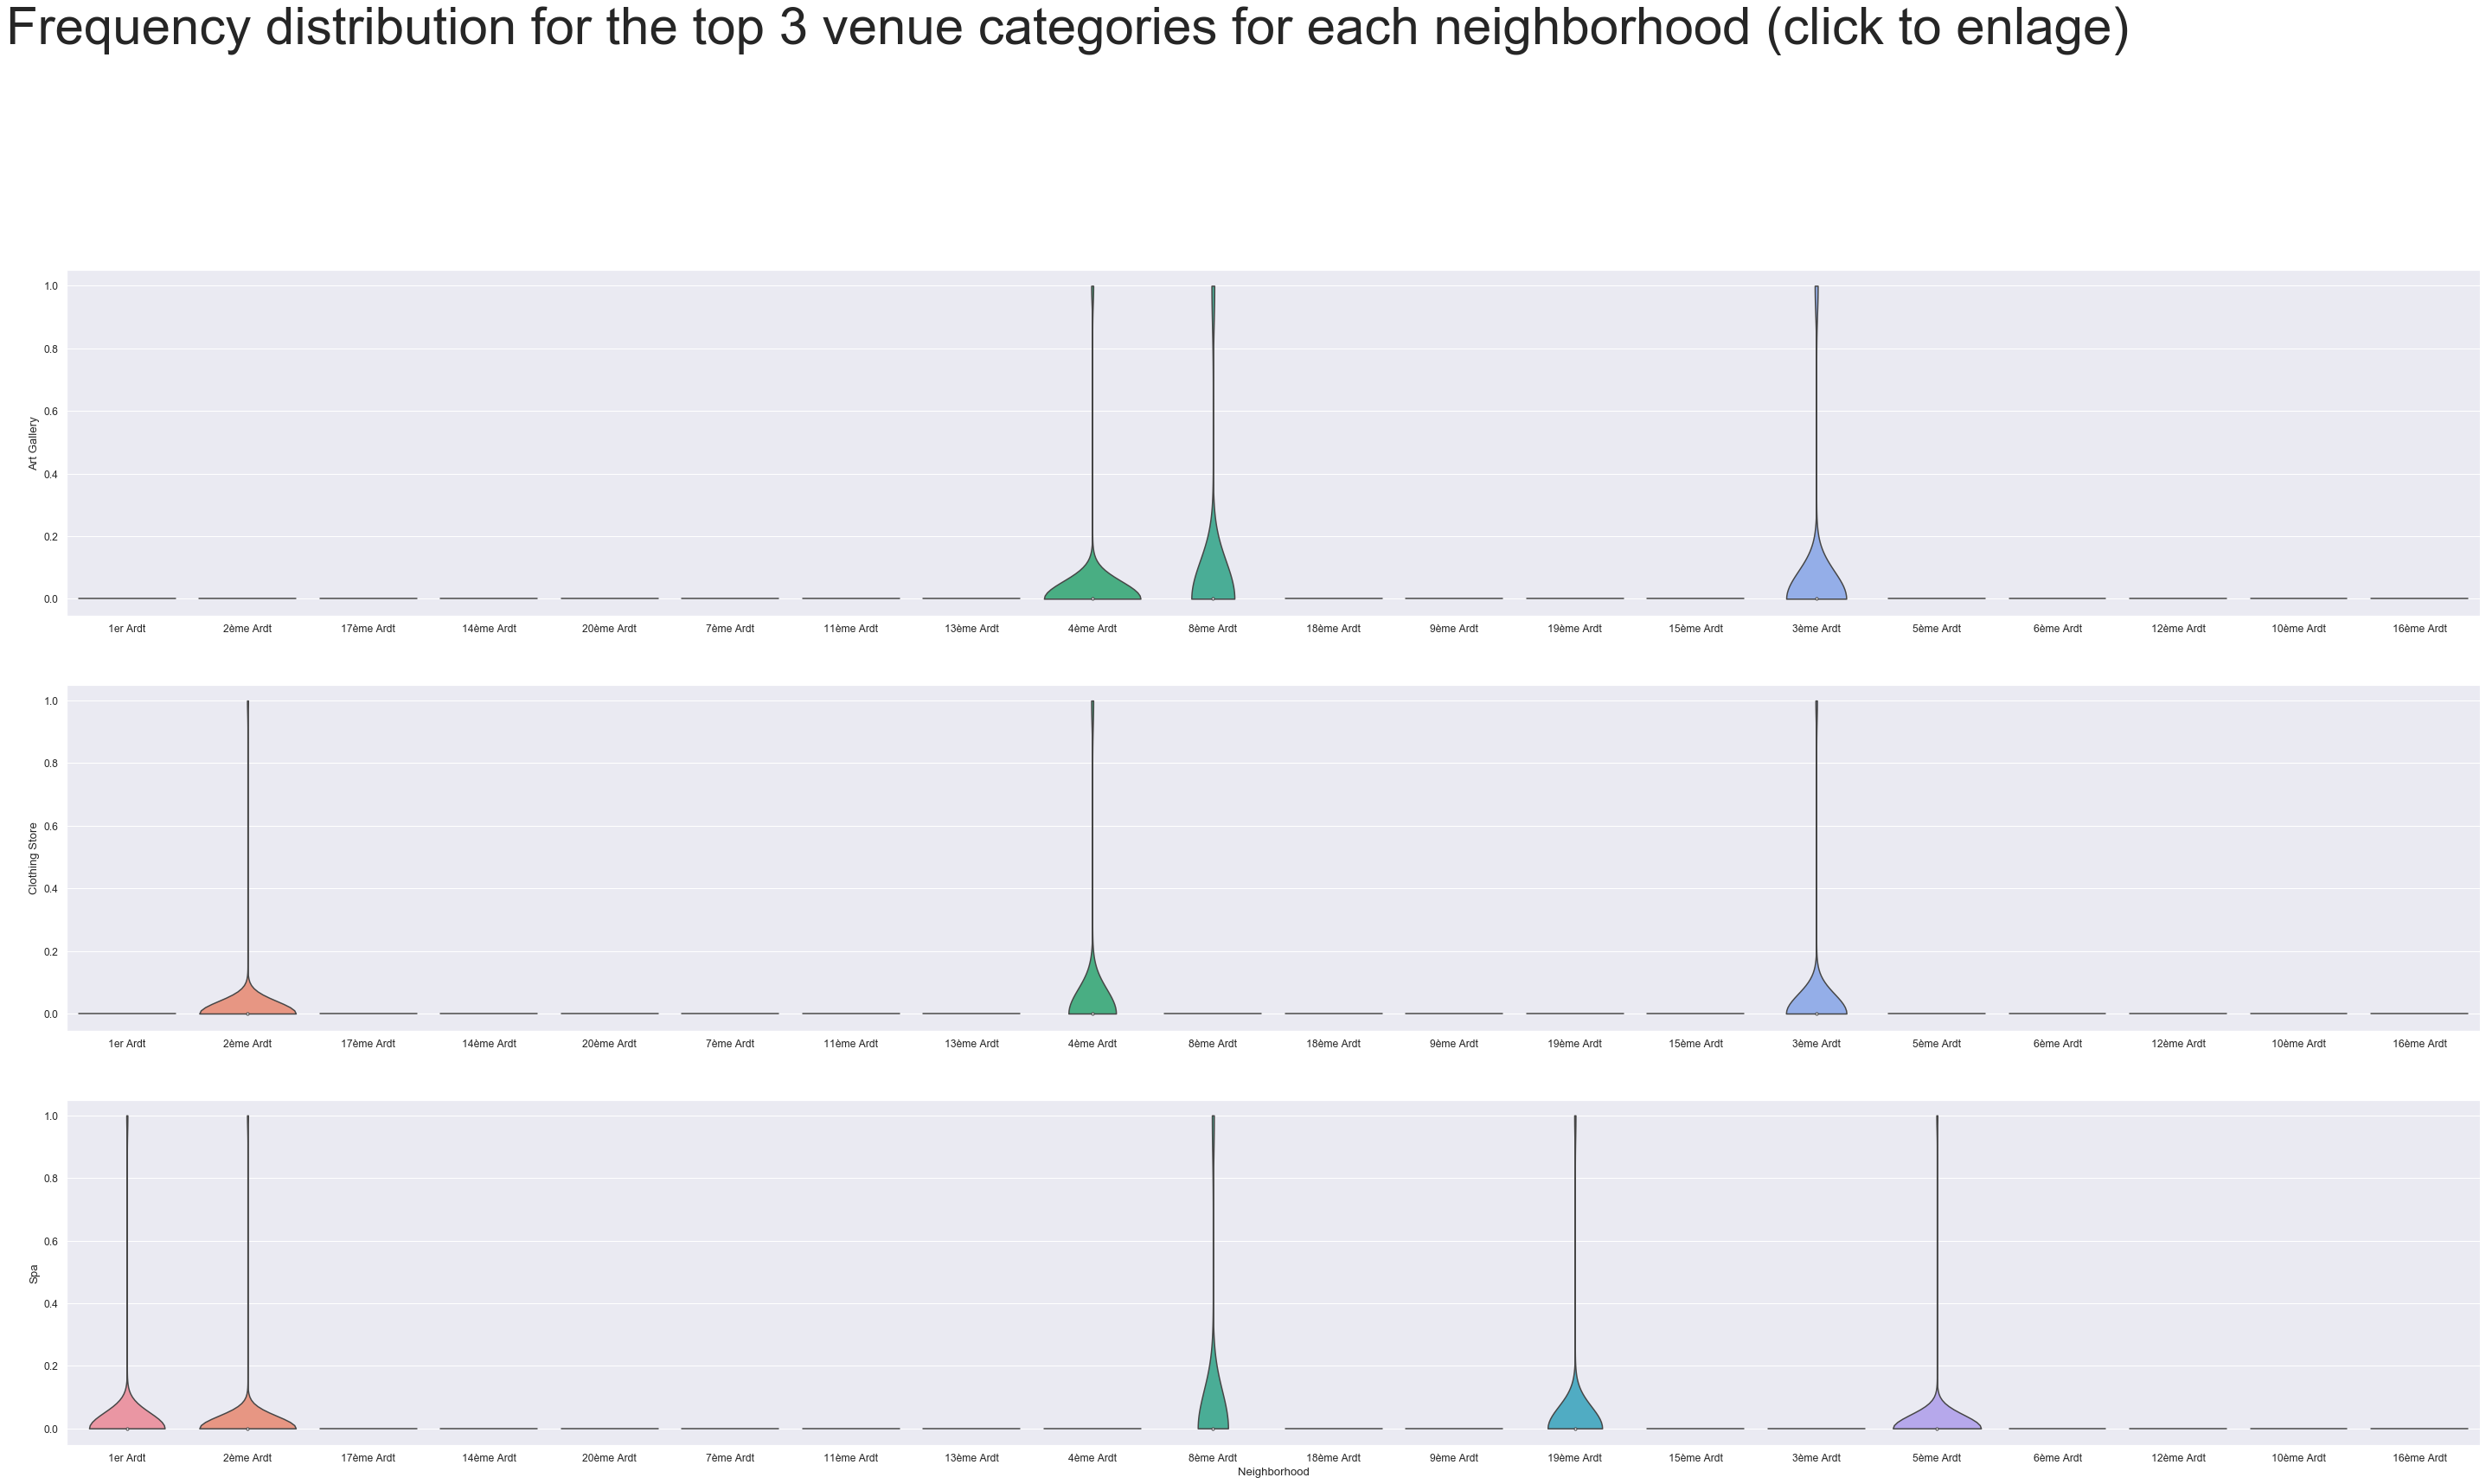

In [24]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Art Gallery", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Spa", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

#### The Neighborhoods
So as we can see from the analysis there are 4 neighborhoods to open new restaurant - according to the criteria that they have the 2/3 specified venues in a great frequency (Clothing stores, spa, art gallery). They are as follows:
##### Neighborhoods
* 2eme Ardt
* 4eme Ardt
* 8eme Ardt
* 3eme Ardt

The function below will show to us the neighberhoods where we have a high concurence and where we have low concurence inorder to open our japanese restaurant.
The neighberhoods where we have low concurrence are : 
* 12eme Ardt
* 14eme Ardt
* 16eme Ardt
* 4eme Ardt
* 2eme Ardt

So if we take in to acount the neighberhoods where our criteria applies (Clothing store, spa, art gallery) we can say that the neighberhoods where we have low concurrence and where our criteria is respected are : 
* 4eme Ardt
* 2eme Ardt

In [25]:
def where_concurence(type_rest, concurence):
    stat_per_neigh = paris_grouped[[type_rest, 'Neighborhood']]
    if concurence == 'High concurence':
        return stat_per_neigh.sort_values(by =type_rest, ascending=False).head()
    elif concurence == 'Low concurence':
        return stat_per_neigh.sort_values(by =type_rest, ascending=True).head()

where_concurence('Japanese Restaurant', 'Low concurence')



,Japanese Restaurant,Neighborhood
2,0.0,12ème Ardt
4,0.0,14ème Ardt
6,0.0,16ème Ardt
14,0.0,4ème Ardt
12,0.0,2ème Ardt


So there are 5 neighborhoods that have a null frequency density of japanese stores and 5 neighborhoods that have a significant frequency density.


In [26]:
where_concurence('Japanese Restaurant', 'High concurence')

,Japanese Restaurant,Neighborhood
10,0.084507,1er Ardt
7,0.071429,17ème Ardt
11,0.060000,20ème Ardt
13,0.058824,3ème Ardt
5,0.032258,15ème Ardt


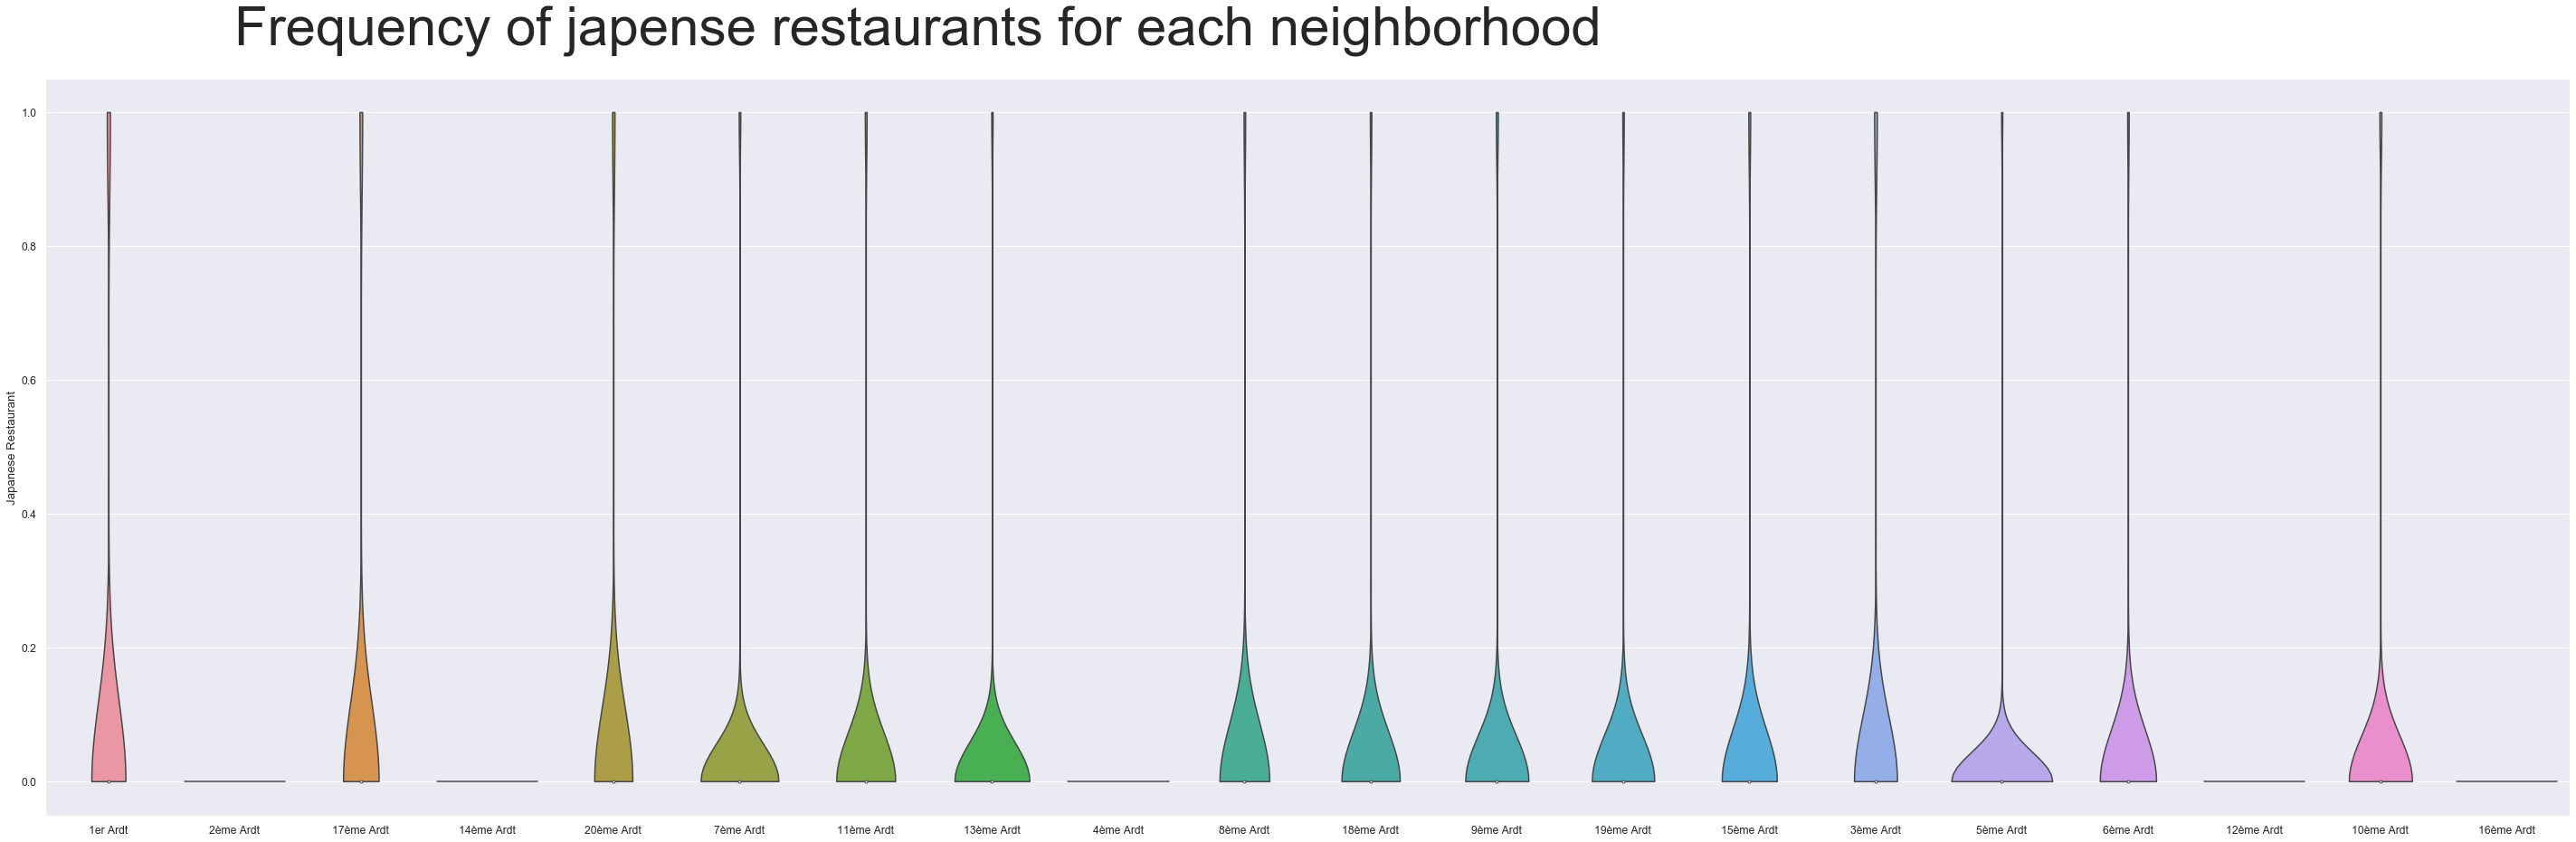

In [27]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Japanese Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of japense restaurants for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Japanese_restaurantq_Venues.png", dpi=240)
plt.show()

Let's add this to the analysis with the other 3 specified categories as below :

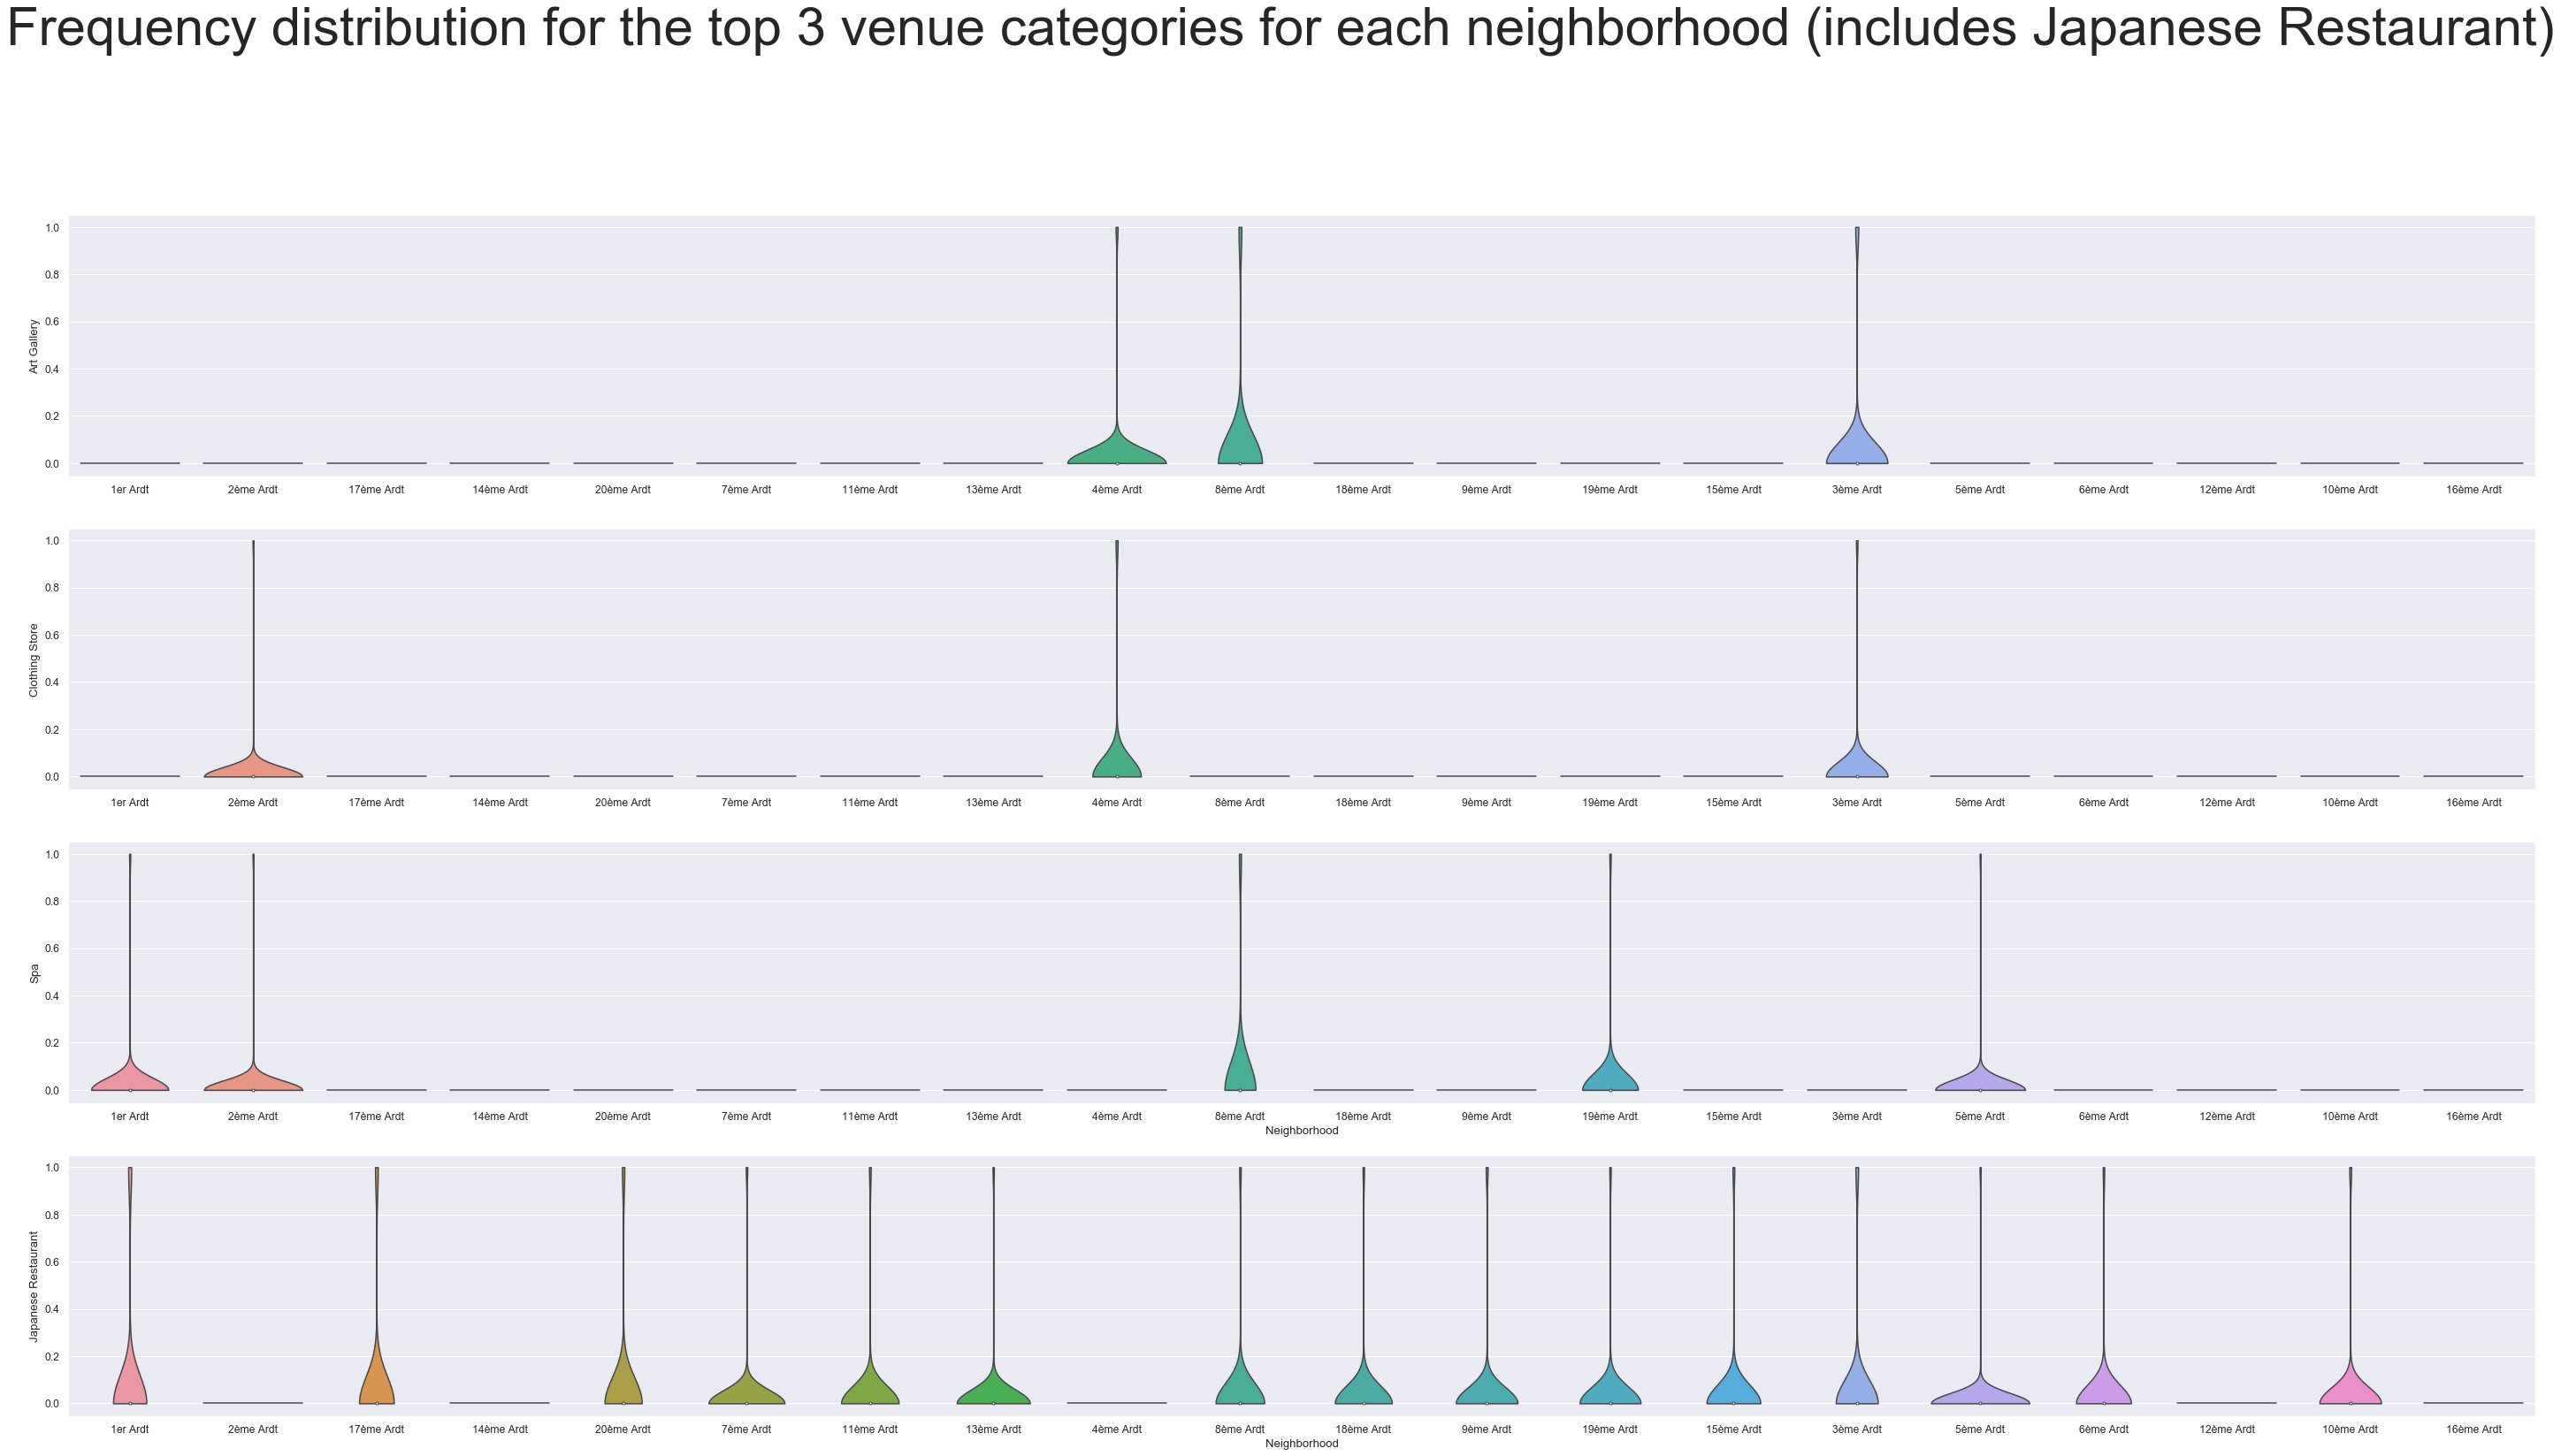

In [28]:
# Japanese Restaurant has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="Art Gallery", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Spa", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Japanese Restaurant", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes Japanese Restaurant)', fontsize=60)

plt.show()

#### discussions 
The reasoning being that if the 2/3 criteria are met - identifying lively neighbourhoods with art galleries, spas and clothing stores - the addition of japenese restaurant concurrence to the neighbourhood's mix of shops is an important bonus. 

Thus, the last two potential new japanese restaurant locations are those where four criteria are met :
* 4eme Ardt
* 2eme Ardt

Let's look at the 2 districts on a Paris map

In [67]:
chosen_neighberhoods = paris.loc[(paris['Arrondissement_Num'] == 2) | (paris['Arrondissement_Num'] == 4) ]
chosen_neighberhoods

,Arrondissement_Num,french name,Neighborhood,lat,lon
1,2,2ème Ardt,Bourse,48.8682792225,2.34280254689
8,4,4ème Ardt,Hôtel-de-Ville,48.8543414263,2.35762962032


In [68]:
# Create a folium map of Paris with the 2 neighborhoods superimposed on the map
map_chosen_neighberhoods = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_neighberhoods['lat'], chosen_neighberhoods['lon'], chosen_neighberhoods['french name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_neighberhoods)  
    
map_chosen_neighberhoods

From this visualisation it is clear that on a practical level, with no data to base decisions on, the circle of the 20 districs is very large, and researching and then visiting them all would be a daunting and time consuming task. We have narrowed the search area down significantly from 20 potential districts to 2 that should suit the client's wish to open its restaurant.

We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of the new restaurant to meet the criteria of being in neighbourhoods that are lively with abundant leisure venues, and to narrow the search down to just a few of the main areas that are best suited to match the criteria.

This analysis could have been carried out in a number of ways, using different methodologies and perhaps different data sources. I chose this because it allowed me to narrow down the options without complicating what is in fact simple in many ways: meeting the criteria of the surrounding sites and the concurrence 

Without the use of data to make targeted decisions, the process could have been lengthy and could have resulted in the new restaurant opening in non-standard areas for the customer. The data helped to provide a better strategy and a better way forward, and these data-driven decisions will lead to a better solution in the end.